<a href="https://colab.research.google.com/github/ColbyGates3/Phase_5_Project/blob/main/Rice_Yield_EDA_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd, numpy as np, os
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, PolynomialFeatures, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score, KFold
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans


drive.mount('/content/drive')

Mounted at /content/drive


## Import Data

In [2]:
train = pd.read_csv('/content/drive/MyDrive/Flatiron/Capstone/Train.csv')
test = pd.read_csv('/content/drive/MyDrive/Flatiron/Capstone/Test.csv')

train.head()

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,...,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
0,ID_GTFAC7PEVWQ9,Nalanda,Noorsarai,45,40,TractorPlough FourWheelTracRotavator,2022-07-20,5,Manual_PuddledRandom,2022-06-27,...,machine,2022-11-16,NaN,2022-11-16,machine,30,40,plowed_in_soil,0.312500,600
1,ID_TK40ARLSPOKS,Nalanda,Rajgir,26,26,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-18,5,Manual_PuddledRandom,2022-06-20,...,hand,2022-11-25,3.0,2022-12-24,machine,24,10,plowed_in_soil,0.312500,600
2,ID_1FJY2CRIMLZZ,Gaya,Gurua,10,10,TractorPlough FourWheelTracRotavator,2022-06-30,6,Manual_PuddledRandom,2022-06-20,...,hand,2022-12-12,480.0,2023-01-11,machine,30,10,plowed_in_soil,0.148148,225
3,ID_I3IPXS4DB7NE,Gaya,Gurua,15,15,TractorPlough FourWheelTracRotavator,2022-06-16,6,Manual_PuddledRandom,2022-06-17,...,hand,2022-12-02,240.0,2022-12-29,hand,26,10,plowed_in_soil,0.222222,468
4,ID_4T8YQWXWHB4A,Nalanda,Noorsarai,60,60,TractorPlough WetTillagePuddling,2022-07-19,4,Manual_PuddledRandom,2022-06-21,...,machine,2022-11-30,NaN,2022-12-02,machine,24,40,plowed_in_soil,0.468750,550


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Data columns (total 44 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  3870 non-null   object 
 1   District                            3870 non-null   object 
 2   Block                               3870 non-null   object 
 3   CultLand                            3870 non-null   int64  
 4   CropCultLand                        3870 non-null   int64  
 5   LandPreparationMethod               3870 non-null   object 
 6   CropTillageDate                     3870 non-null   object 
 7   CropTillageDepth                    3870 non-null   int64  
 8   CropEstMethod                       3870 non-null   object 
 9   RcNursEstDate                       3787 non-null   object 
 10  SeedingSowingTransplanting          3870 non-null   object 
 11  SeedlingsPerPit                     3581 no

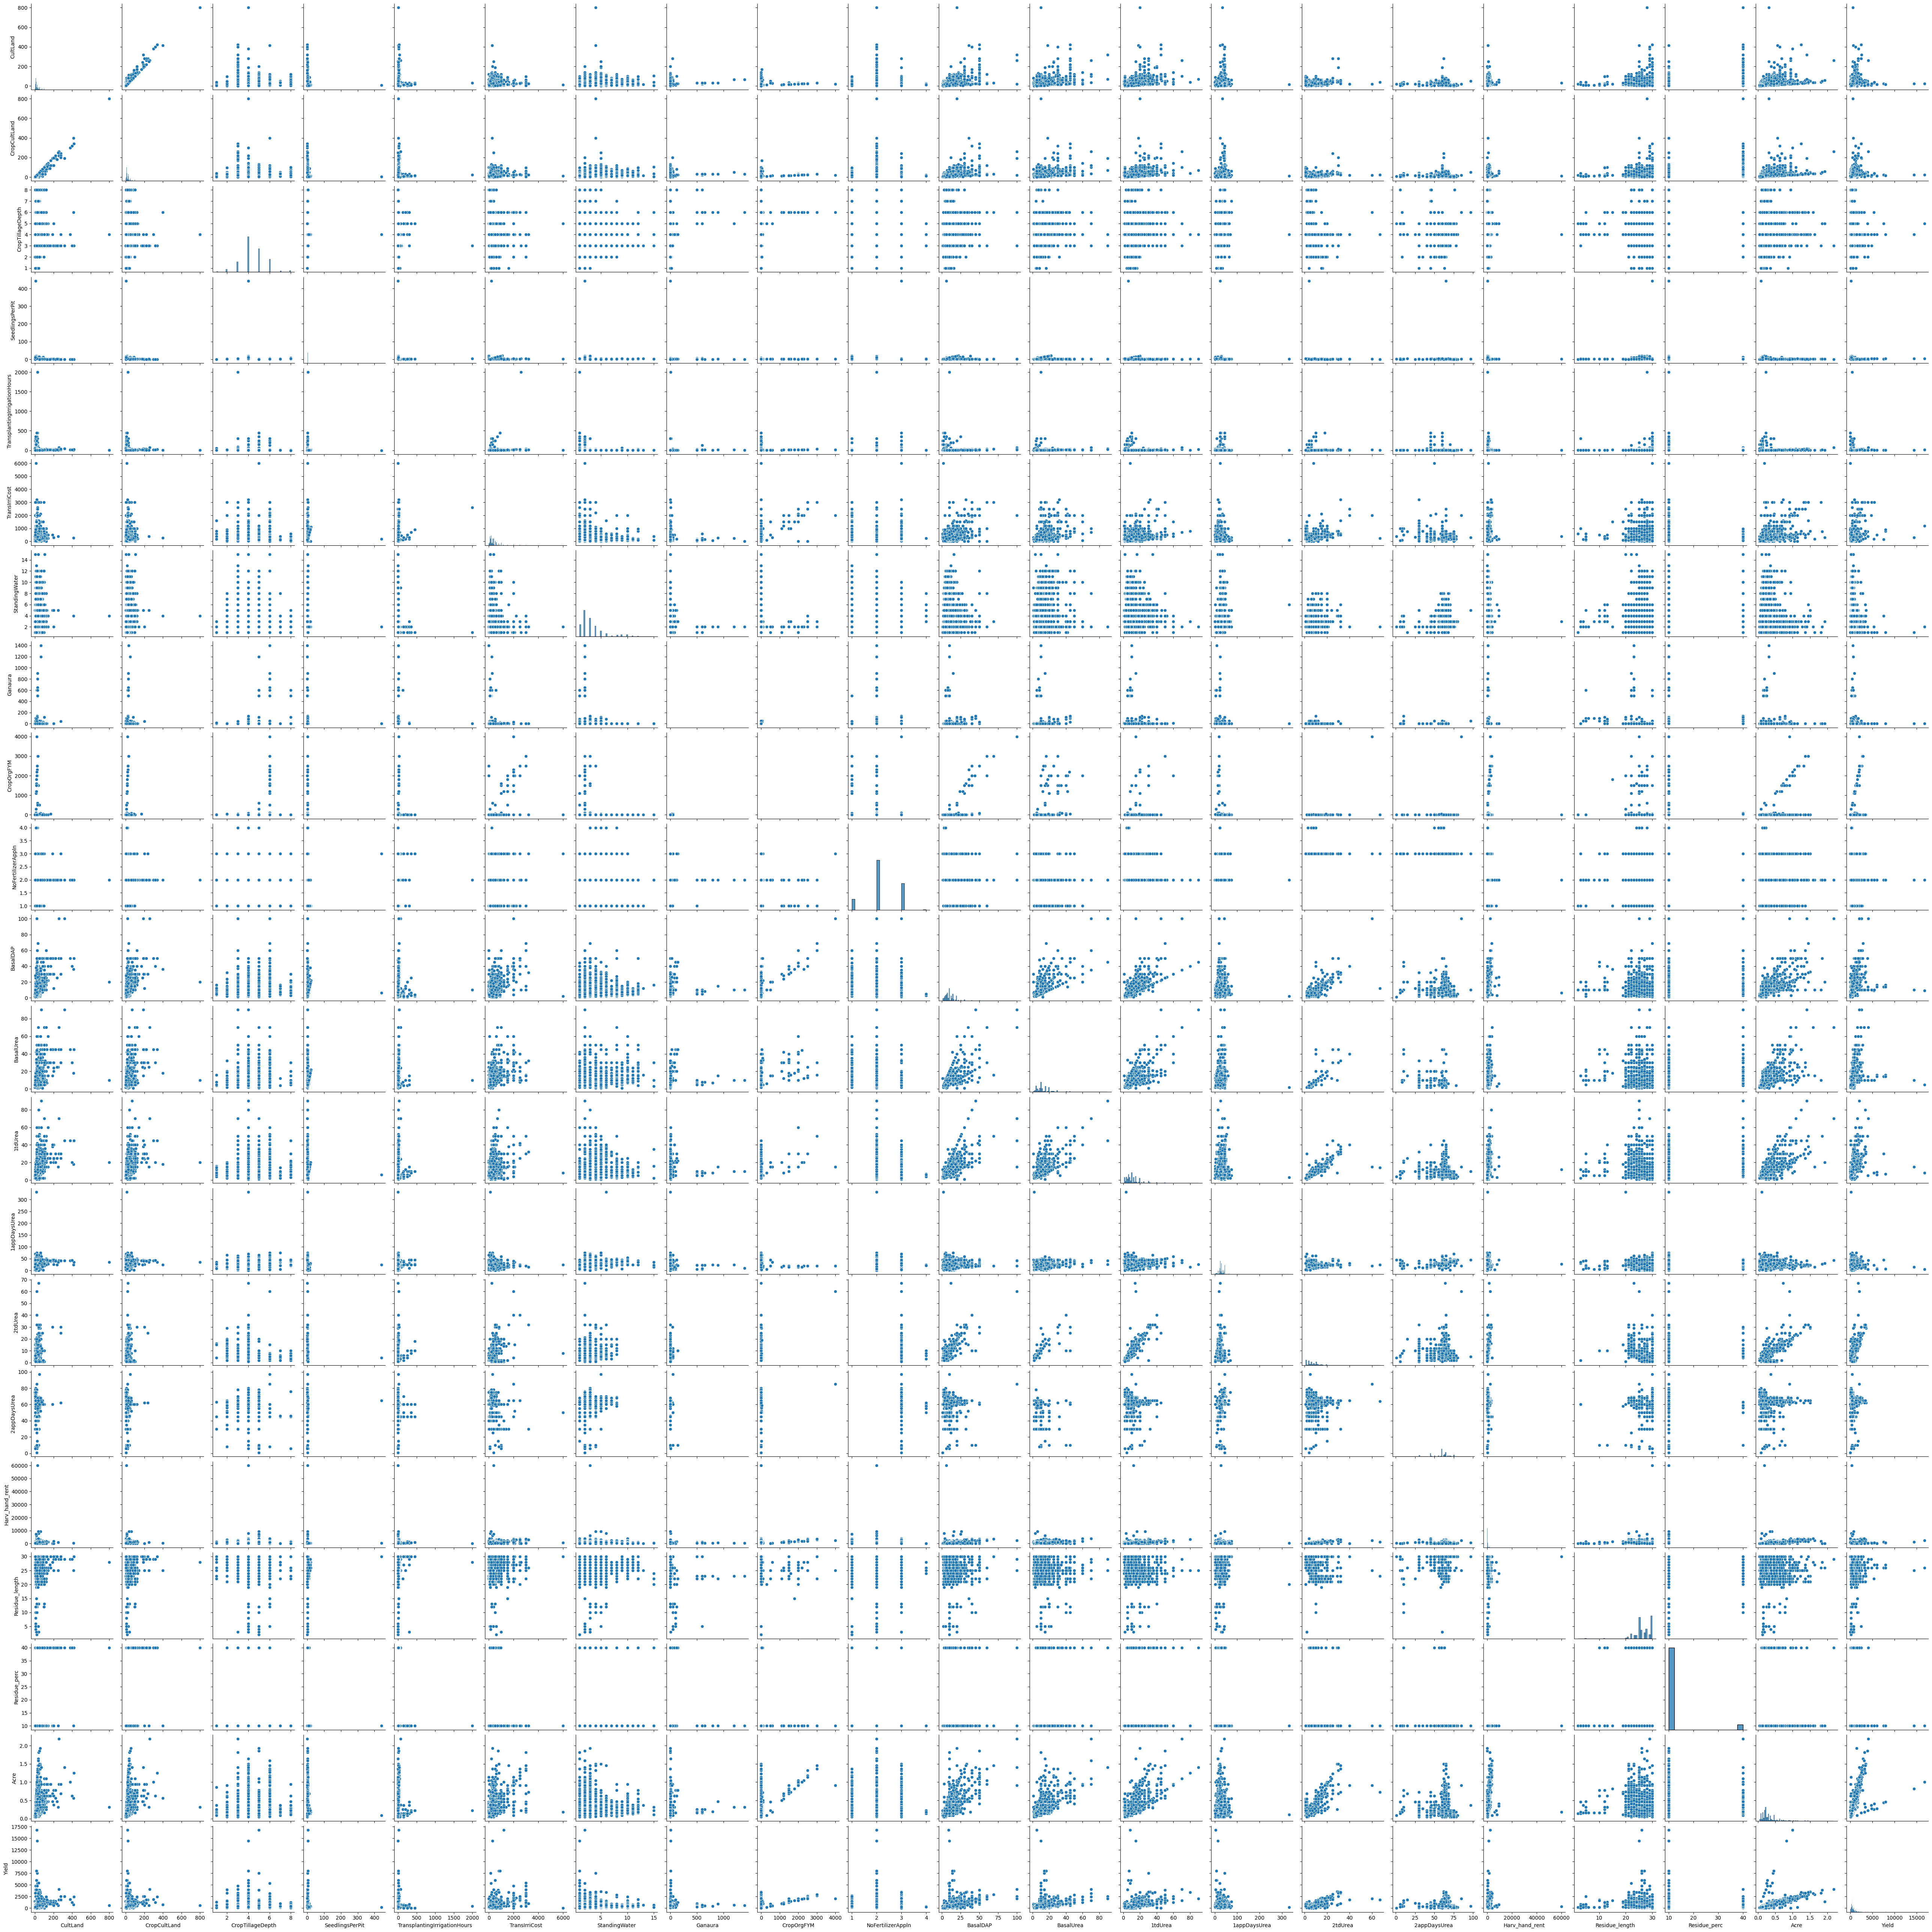

In [ ]:
sns.pairplot(train.select_dtypes(include=['number']))

### Explore Target Variable

Text(0, 0.5, 'Acre')

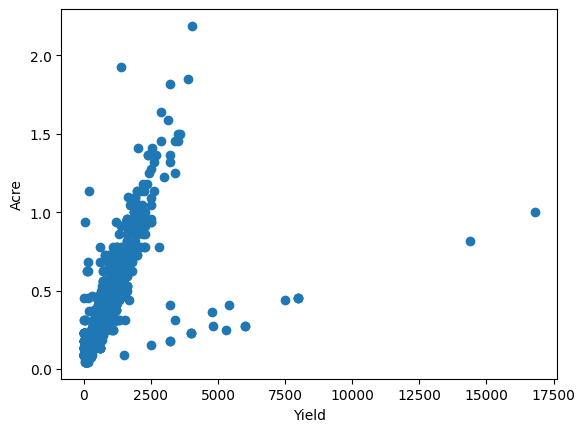

In [4]:
plt.scatter(train.Yield, train.Acre)
plt.xlabel('Yield')
plt.ylabel('Acre')

(array([3.196e+03, 5.400e+02, 9.600e+01, 1.500e+01, 1.100e+01, 2.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 3.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([4.00000e+00, 8.43800e+02, 1.68360e+03, 2.52340e+03, 3.36320e+03,
        4.20300e+03, 5.04280e+03, 5.88260e+03, 6.72240e+03, 7.56220e+03,
        8.40200e+03, 9.24180e+03, 1.00816e+04, 1.09214e+04, 1.17612e+04,
        1.26010e+04, 1.34408e+04, 1.42806e+04, 1.51204e+04, 1.59602e+04,
        1.68000e+04]),
 <BarContainer object of 20 artists>)

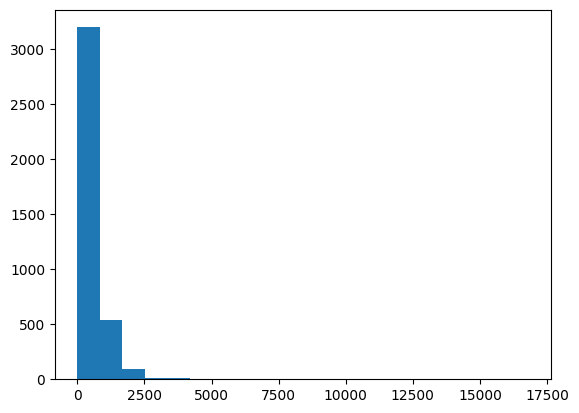

In [5]:
plt.hist(train.Yield, bins = 20)

<Axes: ylabel='Yield'>

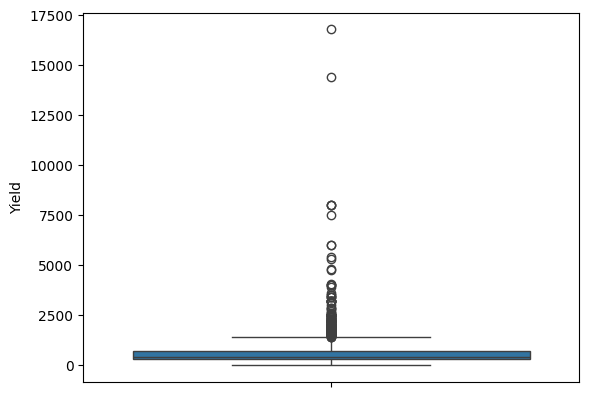

In [6]:
sns.boxplot(train['Yield'])

### Normalize Target by Acre

In [7]:
train['Yield/Acre'] = train['Yield']/train['Acre']

(array([1.830e+02, 2.956e+03, 6.770e+02, 3.200e+01, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 1.200e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 3.000e+00]),
 array([1.540000e+01, 1.114630e+03, 2.213860e+03, 3.313090e+03,
        4.412320e+03, 5.511550e+03, 6.610780e+03, 7.710010e+03,
        8.809240e+03, 9.908470e+03, 1.100770e+04, 1.210693e+04,
        1.320616e+04, 1.430539e+04, 1.540462e+04, 1.650385e+04,
        1.760308e+04, 1.870231e+04, 1.980154e+04, 2.090077e+04,
        2.200000e+04]),
 <BarContainer object of 20 artists>)

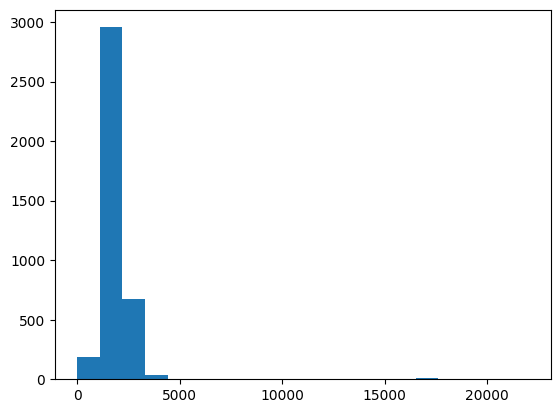

In [8]:
plt.hist(train['Yield/Acre'], bins = 20)

<Axes: ylabel='Yield/Acre'>

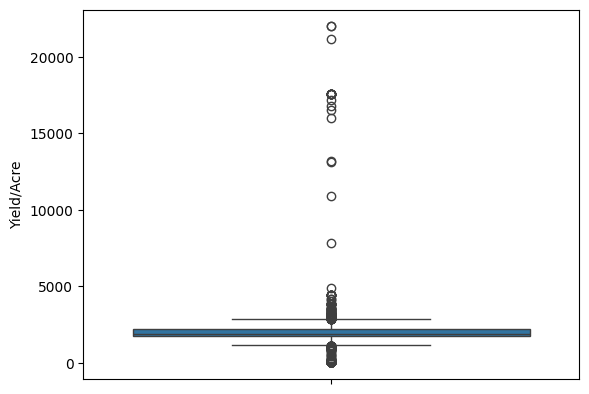

In [9]:
sns.boxplot(train['Yield/Acre'])

In [10]:
train['Yield/Acre'].describe()

count     3870.000000
mean      1967.609330
std       1242.737714
min         15.400000
25%       1760.000000
50%       1890.000000
75%       2198.437500
max      22000.000000
Name: Yield/Acre, dtype: float64

### Identifying Outliers

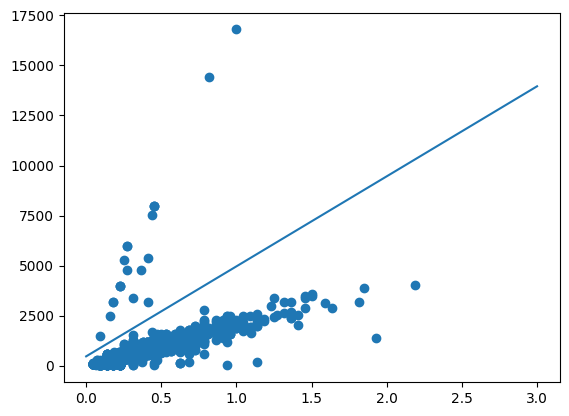

In [11]:
x_line = np.linspace(0, 3, 100)
y_line = 4500 * x_line + 460

plt.scatter(train['Acre'], train['Yield'])

plt.plot(x_line, y_line)

### Identifying NANs

In [12]:
train.isna().sum()

ID                                       0
District                                 0
Block                                    0
CultLand                                 0
CropCultLand                             0
LandPreparationMethod                    0
CropTillageDate                          0
CropTillageDepth                         0
CropEstMethod                            0
RcNursEstDate                           83
SeedingSowingTransplanting               0
SeedlingsPerPit                        289
NursDetFactor                          289
TransDetFactor                         289
TransplantingIrrigationHours           193
TransplantingIrrigationSource          115
TransplantingIrrigationPowerSource     503
TransIrriCost                          882
StandingWater                          238
OrgFertilizers                        1335
Ganaura                               2417
CropOrgFYM                            2674
PCropSolidOrgFertAppMethod            1337
NoFertilize

## Filling NANs




(array([3.58e+03, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00]),
 array([  1. ,  45.1,  89.2, 133.3, 177.4, 221.5, 265.6, 309.7, 353.8,
        397.9, 442. ]),
 <BarContainer object of 10 artists>)

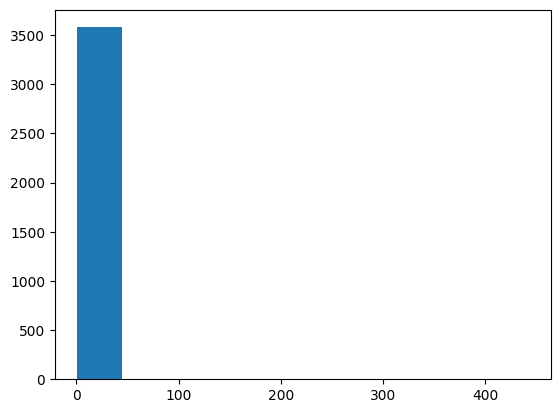

In [13]:
#removing columns with insufficient data
train = train.drop(columns = ['Ganaura', 'OrgFertilizers', 'CropOrgFYM', 'PCropSolidOrgFertAppMethod', 'BasalUrea', 'BasalDAP', '1tdUrea', '1appDaysUrea','2tdUrea', '2appDaysUrea'])


train[train['SeedlingsPerPit'].isna()]
plt.hist(train['SeedlingsPerPit'])


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  3870 non-null   object 
 1   District                            3870 non-null   object 
 2   Block                               3870 non-null   object 
 3   CultLand                            3870 non-null   int64  
 4   CropCultLand                        3870 non-null   int64  
 5   LandPreparationMethod               3870 non-null   object 
 6   CropTillageDate                     3870 non-null   object 
 7   CropTillageDepth                    3870 non-null   int64  
 8   CropEstMethod                       3870 non-null   object 
 9   RcNursEstDate                       3787 non-null   object 
 10  SeedingSowingTransplanting          3870 non-null   object 
 11  SeedlingsPerPit                     3581 no

In [15]:
train['SeedlingsPerPit'] = train['SeedlingsPerPit'].fillna(train['SeedlingsPerPit'].median())
train['SeedlingsPerPit'].value_counts()

2.0      1804
1.0       860
3.0       509
4.0       468
5.0        62
8.0        41
10.0       32
6.0        24
7.0        11
9.0        11
12.0       10
14.0       10
11.0        5
16.0        5
13.0        5
20.0        4
18.0        4
15.0        2
442.0       1
22.0        1
19.0        1
Name: SeedlingsPerPit, dtype: int64

In [16]:
train['NursDetFactor'].value_counts()

CalendarDate PreMonsoonShowers IrrigWaterAvailability LabourAvailability SeedAvailability    560
CalendarDate IrrigWaterAvailability                                                          379
CalendarDate                                                                                 324
CalendarDate IrrigWaterAvailability SeedAvailability                                         306
LabourAvailability                                                                           196
                                                                                            ... 
IrrigWaterAvailability CalendarDate PreMonsoonShowers LabourAvailability                       1
LabourAvailability SeedAvailability IrrigWaterAvailability PreMonsoonShowers                   1
CalendarDate PreMonsoonShowers SeedAvailability IrrigWaterAvailability LabourAvailability      1
CalendarDate SeedAvailability PreMonsoonShowers IrrigWaterAvailability                         1
LabourAvailability IrrigWaterA

In [17]:
train['NursDetFactor'] = train['NursDetFactor'].fillna('Unknown')
train['TransDetFactor'] = train['TransDetFactor'].fillna('Unknown')

In [18]:
train['TransplantingIrrigationHours'] = train['TransplantingIrrigationHours'].fillna(train['TransplantingIrrigationHours'].median())
train['TransplantingIrrigationSource'] = train['TransplantingIrrigationSource'].fillna('Unknown')
train['TransplantingIrrigationPowerSource'] = train['TransplantingIrrigationPowerSource'].fillna('Unknown')

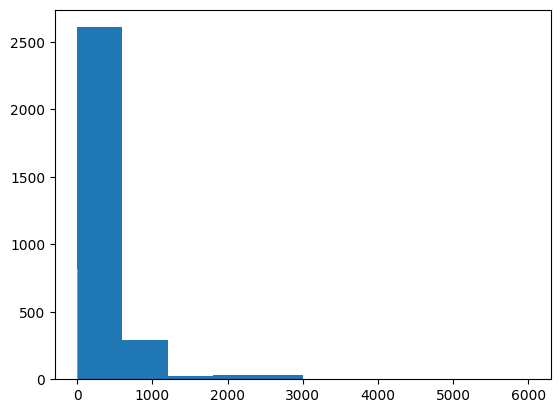

In [19]:
plt.hist(train['TransIrriCost'])
plt.hist(train['StandingWater'])


train['TransIrriCost'] = train['TransIrriCost'].fillna(train['TransIrriCost'].median())
train['StandingWater'] = train['StandingWater'].fillna(train['StandingWater'].median())


In [20]:
train['CropbasalFerts'] = train['CropbasalFerts'].fillna('Unknown')
train['FirstTopDressFert'] = train['FirstTopDressFert'].fillna('Unknown')
train['MineralFertAppMethod.1'] = train['MineralFertAppMethod.1'].fillna('Unknown')
train['RcNursEstDate'] = train['RcNursEstDate'].fillna('Unknown')


train['Harv_hand_rent'] = train['Harv_hand_rent'].fillna(train['Harv_hand_rent'].median())

## Split Into Categorical and Numerical

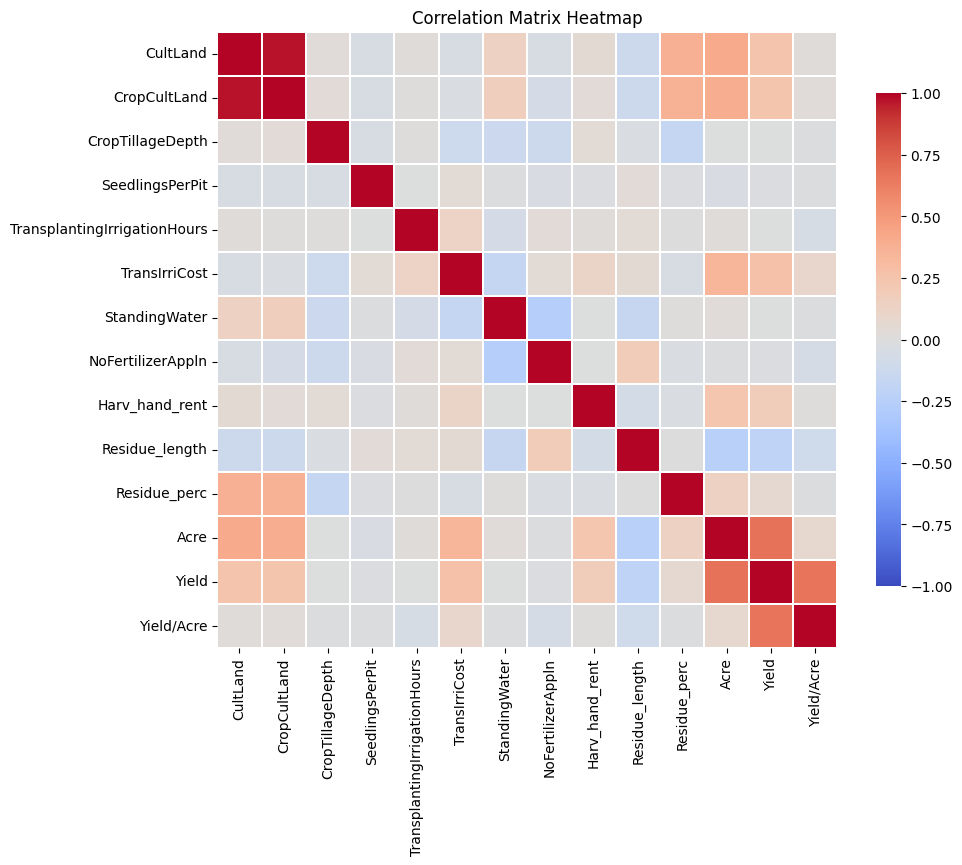

In [21]:
train_num = train.select_dtypes(include=['number'])
train_cat = train.select_dtypes(include=['object'])
corr = train_num.corr()
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f",
            linewidths=.05, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap')
plt.show()

In [22]:
train = train.drop(columns = ['CultLand'])

## Categorical Grouping

In [23]:
train_cat.District.value_counts()

Nalanda     1193
Jamui       1127
Vaishali     980
Gaya         570
Name: District, dtype: int64

In [24]:
train_cat.Block.value_counts()

Rajgir        850
Jamui         626
Mahua         607
Khaira        500
Gurua         358
Noorsarai     343
Chehrakala    239
Wazirganj     213
Garoul        134
Name: Block, dtype: int64

In [25]:
prep_vals =list(train_cat.LandPreparationMethod.unique())

In [26]:
#Identifying all crossover between different values
def group_by_length(list):
    length_dict = {}
    for string in list:
        length = len(string)
        if length not in length_dict:
            length_dict[length] = [string]
        else:
            length_dict[length].append(string)
    return length_dict

group_by_length(prep_vals)



{36: ['TractorPlough FourWheelTracRotavator',
  'FourWheelTracRotavator TractorPlough',
  'FourWheelTracRotavator BullockPlough'],
 55: ['WetTillagePuddling TractorPlough FourWheelTracRotavator',
  'TractorPlough WetTillagePuddling FourWheelTracRotavator',
  'WetTillagePuddling FourWheelTracRotavator TractorPlough',
  'TractorPlough FourWheelTracRotavator WetTillagePuddling',
  'FourWheelTracRotavator TractorPlough WetTillagePuddling',
  'FourWheelTracRotavator WetTillagePuddling TractorPlough'],
 32: ['TractorPlough WetTillagePuddling',
  'WetTillagePuddling TractorPlough',
  'BullockPlough WetTillagePuddling'],
 13: ['TractorPlough', 'BullockPlough'],
 22: ['FourWheelTracRotavator'],
 18: ['WetTillagePuddling'],
 27: ['TractorPlough BullockPlough', 'BullockPlough TractorPlough'],
 69: ['WetTillagePuddling TractorPlough FourWheelTracRotavator BullockPlough',
  'WetTillagePuddling FourWheelTracRotavator BullockPlough TractorPlough',
  'WetTillagePuddling BullockPlough TractorPlough Fou

In [27]:
prep_dict = {'TractorPlough FourWheelTracRotavator': 'TractorPlough FourWheelTracRotavator',
             'FourWheelTracRotavator TractorPlough': 'TractorPlough FourWheelTracRotavator',
             'TractorPlough WetTillagePuddling FourWheelTracRotavator': 'WetTillagePuddling TractorPlough FourWheelTracRotavator',
             'WetTillagePuddling FourWheelTracRotavator TractorPlough': 'WetTillagePuddling TractorPlough FourWheelTracRotavator',
             'TractorPlough FourWheelTracRotavator WetTillagePuddling': 'WetTillagePuddling TractorPlough FourWheelTracRotavator',
             'FourWheelTracRotavator TractorPlough WetTillagePuddling': 'WetTillagePuddling TractorPlough FourWheelTracRotavator',
             'FourWheelTracRotavator WetTillagePuddling TractorPlough': 'WetTillagePuddling TractorPlough FourWheelTracRotavator',
             'WetTillagePuddling TractorPlough': 'TractorPlough WetTillagePuddling',
             'WetTillagePuddling FourWheelTracRotavator BullockPlough TractorPlough': 'WetTillagePuddling TractorPlough FourWheelTracRotavator BullockPlough',
             'WetTillagePuddling BullockPlough TractorPlough FourWheelTracRotavator': 'WetTillagePuddling TractorPlough FourWheelTracRotavator BullockPlough',
             'BullockPlough TractorPlough WetTillagePuddling FourWheelTracRotavator': 'WetTillagePuddling TractorPlough FourWheelTracRotavator BullockPlough',
             'WetTillagePuddling FourWheelTracRotavator TractorPlough BullockPlough': 'WetTillagePuddling TractorPlough FourWheelTracRotavator BullockPlough',
             'TractorPlough WetTillagePuddling FourWheelTracRotavator BullockPlough': 'WetTillagePuddling TractorPlough FourWheelTracRotavator BullockPlough',
             'WetTillagePuddling TractorPlough BullockPlough FourWheelTracRotavator': 'WetTillagePuddling TractorPlough FourWheelTracRotavator BullockPlough',
             'BullockPlough FourWheelTracRotavator TractorPlough WetTillagePuddling': 'WetTillagePuddling TractorPlough FourWheelTracRotavator BullockPlough',
             'WetTillagePuddling BullockPlough FourWheelTracRotavator TractorPlough': 'WetTillagePuddling TractorPlough FourWheelTracRotavator BullockPlough',
             'FourWheelTracRotavator BullockPlough WetTillagePuddling TractorPlough': 'WetTillagePuddling TractorPlough FourWheelTracRotavator BullockPlough',
             'FourWheelTracRotavator WetTillagePuddling BullockPlough TractorPlough': 'WetTillagePuddling TractorPlough FourWheelTracRotavator BullockPlough',
             'TractorPlough WetTillagePuddling BullockPlough FourWheelTracRotavator': 'WetTillagePuddling TractorPlough FourWheelTracRotavator BullockPlough',
             'TractorPlough FourWheelTracRotavator BullockPlough WetTillagePuddling': 'WetTillagePuddling TractorPlough FourWheelTracRotavator BullockPlough',
             'TractorPlough FourWheelTracRotavator WetTillagePuddling BullockPlough': 'WetTillagePuddling TractorPlough FourWheelTracRotavator BullockPlough',
             'TractorPlough WetTillagePuddling BullockPlough': 'WetTillagePuddling TractorPlough BullockPlough',
             'WetTillagePuddling BullockPlough TractorPlough': 'WetTillagePuddling TractorPlough BullockPlough',
             'TractorPlough BullockPlough WetTillagePuddling': 'WetTillagePuddling TractorPlough BullockPlough',
             'BullockPlough TractorPlough WetTillagePuddling': 'WetTillagePuddling TractorPlough BullockPlough',
             'WetTillagePuddling FourWheelTracRotavator': 'FourWheelTracRotavator WetTillagePuddling',
             'Other': 'Other'
             }

In [28]:
train_cat['LandPreparationMethod'] = train_cat['LandPreparationMethod'].replace(prep_dict)

len(list(train['LandPreparationMethod'].unique()))

43

In [29]:
train_cat['TractorPlough'] = train_cat.LandPreparationMethod.apply(lambda x: 1 if 'TractorPlough' in x else 0)
train_cat['WetTillagePuddling'] = train_cat.LandPreparationMethod.apply(lambda x: 1 if 'WetTillagePuddling' in x else 0)
train_cat['FourWheelTracRotavator'] = train_cat.LandPreparationMethod.apply(lambda x: 1 if 'FourWheelTracRotavator' in x else 0)
train_cat['BullockPlough'] = train_cat.LandPreparationMethod.apply(lambda x: 1 if 'BullockPlough' in x else 0)


train_cat = train_cat.drop(columns = ['LandPreparationMethod'])

In [30]:

train_cat.CropEstMethod.value_counts()

Manual_PuddledRandom      3346
Manual_PuddledLine         235
LineSowingAfterTillage     206
Broadcasting                83
Name: CropEstMethod, dtype: int64

In [31]:
train_cat.NursDetFactor.value_counts()

CalendarDate PreMonsoonShowers IrrigWaterAvailability LabourAvailability SeedAvailability    560
CalendarDate IrrigWaterAvailability                                                          379
CalendarDate                                                                                 324
CalendarDate IrrigWaterAvailability SeedAvailability                                         306
Unknown                                                                                      289
                                                                                            ... 
IrrigWaterAvailability CalendarDate PreMonsoonShowers LabourAvailability                       1
LabourAvailability SeedAvailability IrrigWaterAvailability PreMonsoonShowers                   1
CalendarDate PreMonsoonShowers SeedAvailability IrrigWaterAvailability LabourAvailability      1
CalendarDate SeedAvailability PreMonsoonShowers IrrigWaterAvailability                         1
LabourAvailability IrrigWaterA

In [32]:
group_by_length(list(train_cat.NursDetFactor.unique()))

{52: ['CalendarDate IrrigWaterAvailability SeedAvailability',
  'CalendarDate SeedAvailability IrrigWaterAvailability',
  'IrrigWaterAvailability CalendarDate SeedAvailability',
  'IrrigWaterAvailability SeedAvailability CalendarDate',
  'SeedAvailability IrrigWaterAvailability CalendarDate',
  'SeedAvailability CalendarDate IrrigWaterAvailability'],
 89: ['CalendarDate PreMonsoonShowers IrrigWaterAvailability LabourAvailability SeedAvailability',
  'CalendarDate PreMonsoonShowers LabourAvailability IrrigWaterAvailability SeedAvailability',
  'CalendarDate PreMonsoonShowers IrrigWaterAvailability SeedAvailability LabourAvailability',
  'CalendarDate PreMonsoonShowers LabourAvailability SeedAvailability IrrigWaterAvailability',
  'CalendarDate IrrigWaterAvailability LabourAvailability SeedAvailability PreMonsoonShowers',
  'IrrigWaterAvailability LabourAvailability SeedAvailability PreMonsoonShowers CalendarDate',
  'CalendarDate IrrigWaterAvailability PreMonsoonShowers LabourAvailabili

In [33]:
train_cat['Nurs_CalendarDate'] = train_cat.NursDetFactor.apply(lambda x: 1 if 'CalendarDate' in x else 0)
train_cat['Nurs_PreMonsoonShowers'] = train_cat.NursDetFactor.apply(lambda x: 1 if 'PreMonsoonShowers' in x else 0)
train_cat['Nurs_LabourAvailability'] = train_cat.NursDetFactor.apply(lambda x: 1 if 'LabourAvailability' in x else 0)
train_cat['Nurs_IrrigWaterAvailability'] = train_cat.NursDetFactor.apply(lambda x: 1 if 'IrrigWaterAvailability' in x else 0)
train_cat['Nurs_SeedAvailability'] = train_cat.NursDetFactor.apply(lambda x: 1 if 'SeedAvailability' in x else 0)



train_cat = train_cat.drop(columns = ['NursDetFactor'])

In [34]:
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   ID                                  3870 non-null   object
 1   District                            3870 non-null   object
 2   Block                               3870 non-null   object
 3   CropTillageDate                     3870 non-null   object
 4   CropEstMethod                       3870 non-null   object
 5   RcNursEstDate                       3870 non-null   object
 6   SeedingSowingTransplanting          3870 non-null   object
 7   TransDetFactor                      3870 non-null   object
 8   TransplantingIrrigationSource       3870 non-null   object
 9   TransplantingIrrigationPowerSource  3870 non-null   object
 10  CropbasalFerts                      3870 non-null   object
 11  MineralFertAppMethod                3870 non-null   obje

In [35]:
group_by_length(list(train_cat['TransDetFactor'].unique()))


{77: ['CalendarDate SeedlingAge RainArrival IrrigWaterAvailability LaborAvailability',
  'CalendarDate RainArrival IrrigWaterAvailability LaborAvailability SeedlingAge',
  'SeedlingAge CalendarDate RainArrival IrrigWaterAvailability LaborAvailability',
  'CalendarDate SeedlingAge RainArrival LaborAvailability IrrigWaterAvailability',
  'CalendarDate SeedlingAge IrrigWaterAvailability LaborAvailability RainArrival',
  'CalendarDate IrrigWaterAvailability RainArrival SeedlingAge LaborAvailability',
  'LaborAvailability IrrigWaterAvailability RainArrival SeedlingAge CalendarDate',
  'RainArrival IrrigWaterAvailability LaborAvailability SeedlingAge CalendarDate',
  'SeedlingAge RainArrival IrrigWaterAvailability LaborAvailability CalendarDate',
  'CalendarDate SeedlingAge IrrigWaterAvailability RainArrival LaborAvailability',
  'CalendarDate RainArrival LaborAvailability SeedlingAge IrrigWaterAvailability',
  'CalendarDate IrrigWaterAvailability LaborAvailability SeedlingAge RainArrival',


In [36]:
train_cat['Trans_CalendarDate'] = train_cat.TransDetFactor.apply(lambda x: 1 if 'CalendarDate' in x else 0)
train_cat['Trans_PreMonsoonShowers'] = train_cat.TransDetFactor.apply(lambda x: 1 if 'PreMonsoonShowers' in x else 0)
train_cat['Trans_LabourAvailability'] = train_cat.TransDetFactor.apply(lambda x: 1 if 'LabourAvailability' in x else 0)
train_cat['Trans_IrrigWaterAvailability'] = train_cat.TransDetFactor.apply(lambda x: 1 if 'IrrigWaterAvailability' in x else 0)
train_cat['Trans_SeedAvailability'] = train_cat.TransDetFactor.apply(lambda x: 1 if 'SeedAvailability' in x else 0)



train_cat = train_cat.drop(columns = ['TransDetFactor'])

In [37]:
train_cat.TransplantingIrrigationSource.value_counts()

Boring      3228
Canal        373
Unknown      115
Rainfed      103
Pond          36
TubeWell      12
Well           3
Name: TransplantingIrrigationSource, dtype: int64

In [38]:
train_cat.TransplantingIrrigationPowerSource.value_counts()

Electric    2645
Diesel       720
Unknown      503
Solar          2
Name: TransplantingIrrigationPowerSource, dtype: int64

In [39]:
train_cat.CropbasalFerts.value_counts()

DAP Urea             1640
DAP                  1379
Urea                  308
Unknown               188
Urea DAP              134
DAP Other              70
DAP Urea SSP           51
NPK                    29
DAP Urea NPKS          18
NPK Urea                8
Urea DAP SSP            7
Urea NPKS               6
Urea DAP NPKS           3
DAP NPKS                3
DAP SSP                 3
Urea NPKS DAP           3
DAP NPK Urea            2
DAP Urea NPK            1
Urea DAP MoP            1
SSP Urea                1
NPKS                    1
DAP NPKS Urea           1
NPKS DAP Urea           1
DAP Urea NPKS MoP       1
DAP NPKS Urea SSP       1
Urea SSP                1
Urea NPK                1
DAP NPKS Other          1
NPK DAP Urea            1
DAP Urea SSP MoP        1
DAP MoP                 1
DAP Urea NPKS SSP       1
DAP Urea MoP            1
Urea SSP DAP            1
Urea Other DAP          1
Name: CropbasalFerts, dtype: int64

In [40]:
train_cat['DAP'] = train_cat.CropbasalFerts.apply(lambda x: 1 if 'DAP' in x else 0)
train_cat['MoP'] = train_cat.CropbasalFerts.apply(lambda x: 1 if 'MoP' in x else 0)
train_cat['NPKS'] = train_cat.CropbasalFerts.apply(lambda x: 1 if 'NPKS' in x else 0)
train_cat['SSP'] = train_cat.CropbasalFerts.apply(lambda x: 1 if 'SSP' in x else 0)
train_cat['Urea'] = train_cat.CropbasalFerts.apply(lambda x: 1 if 'Urea' in x else 0)

train_cat = train_cat.drop(columns = ['CropbasalFerts'])

In [41]:
train_cat.MineralFertAppMethod.value_counts()

Broadcasting       3214
SoilApplied         638
RootApplication      18
Name: MineralFertAppMethod, dtype: int64

In [42]:
train_cat.FirstTopDressFert.value_counts()

Urea            2798
Unknown          485
DAP Urea         322
Urea DAP         177
DAP               64
NPKS Urea          6
Urea NPKS          5
NPK                3
DAP NPKS           3
NPK Urea           2
DAP NPK Urea       1
Urea NPK           1
DAP NPK            1
Urea SSP           1
Other Urea         1
Name: FirstTopDressFert, dtype: int64

In [43]:
train_cat['TopDress_DAP'] = train_cat.FirstTopDressFert.apply(lambda x: 1 if 'DAP' in x else 0)
train_cat['TopDress_NPKS'] = train_cat.FirstTopDressFert.apply(lambda x: 1 if 'NPKS' in x else 0)
train_cat['TopDress_SSP'] = train_cat.FirstTopDressFert.apply(lambda x: 1 if 'SSP' in x else 0)
train_cat['TopDress_Urea'] = train_cat.FirstTopDressFert.apply(lambda x: 1 if 'Urea' in x else 0)

train_cat = train_cat.drop(columns = ['FirstTopDressFert'])

In [44]:
train_cat['MineralFertAppMethod.1'].value_counts()

Broadcasting       3288
Unknown             481
SoilApplied          64
RootApplication      37
Name: MineralFertAppMethod.1, dtype: int64

In [45]:
train_cat['Harv_method'].value_counts()

hand       3642
machine     228
Name: Harv_method, dtype: int64

In [46]:
train_cat['Threshing_method'].value_counts()

machine    2098
hand       1772
Name: Threshing_method, dtype: int64

In [47]:
train_cat['Stubble_use'].value_counts()

plowed_in_soil    3846
burned              24
Name: Stubble_use, dtype: int64

In [48]:
train_cat['Stubble_use'].value_counts()

plowed_in_soil    3846
burned              24
Name: Stubble_use, dtype: int64

In [49]:
train_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CultLand                      3870 non-null   int64  
 1   CropCultLand                  3870 non-null   int64  
 2   CropTillageDepth              3870 non-null   int64  
 3   SeedlingsPerPit               3870 non-null   float64
 4   TransplantingIrrigationHours  3870 non-null   float64
 5   TransIrriCost                 3870 non-null   float64
 6   StandingWater                 3870 non-null   float64
 7   NoFertilizerAppln             3870 non-null   int64  
 8   Harv_hand_rent                3870 non-null   float64
 9   Residue_length                3870 non-null   int64  
 10  Residue_perc                  3870 non-null   int64  
 11  Acre                          3870 non-null   float64
 12  Yield                         3870 non-null   int64  
 13  Yie

In [50]:
id_column = train_cat.ID
train_num = pd.concat([id_column, train_num], axis=1)

In [51]:
train = pd.merge(train_cat, train_num)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3870 entries, 0 to 3869
Data columns (total 53 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  3870 non-null   object 
 1   District                            3870 non-null   object 
 2   Block                               3870 non-null   object 
 3   CropTillageDate                     3870 non-null   object 
 4   CropEstMethod                       3870 non-null   object 
 5   RcNursEstDate                       3870 non-null   object 
 6   SeedingSowingTransplanting          3870 non-null   object 
 7   TransplantingIrrigationSource       3870 non-null   object 
 8   TransplantingIrrigationPowerSource  3870 non-null   object 
 9   MineralFertAppMethod                3870 non-null   object 
 10  MineralFertAppMethod.1              3870 non-null   object 
 11  Harv_method                         3870 no

In [52]:
outlier_line = 4500 * train['Acre'] + 440

train_dates = train[['ID', 'CropTillageDate', 'RcNursEstDate','Harv_date', 'Threshing_date', 'SeedingSowingTransplanting', 'Yield/Acre']]

train_nodate = train.drop(columns = ['CropTillageDate', 'RcNursEstDate','Harv_date', 'Threshing_date', 'SeedingSowingTransplanting', 'ID'])
X = train_nodate.drop(columns = ['Yield', 'Yield/Acre'])
X_small = train_nodate[train_nodate['Yield'] <= 2199]
X_large = train_nodate[train_nodate['Yield'] > 2199]
X_no_outlier = train_nodate[train_nodate['Yield'] <= outlier_line]

y = train_nodate['Yield/Acre']
y_small = X_small['Yield/Acre']
y_large = X_large['Yield/Acre']
y_no_outlier = X_no_outlier['Yield/Acre']

X_small = X_small.drop(columns = ['Yield/Acre', 'Yield'])
X_large = X_large.drop(columns = ['Yield/Acre', 'Yield'])
X_no_outlier = X_no_outlier.drop(columns = ['Yield/Acre', 'Yield'])


In [53]:
train_dates.isna().sum()

ID                            0
CropTillageDate               0
RcNursEstDate                 0
Harv_date                     0
Threshing_date                0
SeedingSowingTransplanting    0
Yield/Acre                    0
dtype: int64

In [54]:
train_dates['CropTillageDate'].dtype

dtype('O')

In [55]:
train_dates['CropTillage_Year'] = train_dates['CropTillageDate'].str[:4]
train_dates['CropTillage_Month'] = train_dates['CropTillageDate'].str[5:7]
train_dates['CropTillage_Day'] =  train_dates['CropTillageDate'].str[-2:]

train_dates['RcNursEst_Year'] = train_dates['RcNursEstDate'].str[:4]
train_dates['RcNursEst_Month'] = train_dates['RcNursEstDate'].str[5:7]
train_dates['RcNursEst_Day'] =  train_dates['RcNursEstDate'].str[-2:]

train_dates['Harv_Year'] = train_dates['Harv_date'].str[:4]
train_dates['Harv_Month'] = train_dates['Harv_date'].str[5:7]
train_dates['Harv_Day'] =  train_dates['Harv_date'].str[-2:]

train_dates['Threshing_Year'] = train_dates['Threshing_date'].str[:4]
train_dates['Threshing_Month'] = train_dates['Threshing_date'].str[5:7]
train_dates['Threshing_Day'] =  train_dates['Threshing_date'].str[-2:]

train_dates['SeedingSowingTransplanting_Year'] = train_dates['SeedingSowingTransplanting'].str[:4]
train_dates['SeedingSowingTransplanting_Month'] = train_dates['SeedingSowingTransplanting'].str[5:7]
train_dates['SeedingSowingTransplanting_Day'] =  train_dates['SeedingSowingTransplanting'].str[-2:]

train_dates = train_dates.drop(columns = ['CropTillageDate', 'RcNursEstDate', 'Harv_date', 'Threshing_date', 'SeedingSowingTransplanting'])

<ipython-input-55-aea8659882bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dates['CropTillage_Year'] = train_dates['CropTillageDate'].str[:4]
<ipython-input-55-aea8659882bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dates['CropTillage_Month'] = train_dates['CropTillageDate'].str[5:7]
<ipython-input-55-aea8659882bb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [56]:
for column in train_dates.columns[2:]:
    train_dates[column] = pd.to_numeric(train_dates[column], errors='coerce')


train_dates = train_dates.dropna()
train_dates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3787 entries, 0 to 3869
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                3787 non-null   object 
 1   Yield/Acre                        3787 non-null   float64
 2   CropTillage_Year                  3787 non-null   int64  
 3   CropTillage_Month                 3787 non-null   int64  
 4   CropTillage_Day                   3787 non-null   int64  
 5   RcNursEst_Year                    3787 non-null   float64
 6   RcNursEst_Month                   3787 non-null   float64
 7   RcNursEst_Day                     3787 non-null   float64
 8   Harv_Year                         3787 non-null   int64  
 9   Harv_Month                        3787 non-null   int64  
 10  Harv_Day                          3787 non-null   int64  
 11  Threshing_Year                    3787 non-null   int64  
 12  Thresh

In [57]:
train_dates.CropTillage_Year.value_counts()
train_dates = train_dates.drop(columns = ['CropTillage_Year'])

In [58]:
train_dates.CropTillage_Month = train_dates.CropTillage_Month - 4
train_dates.CropTillage_Month.value_counts()
#May = 1, June = 2, July = 3, August = 4

3    2862
2     824
4     100
1       1
Name: CropTillage_Month, dtype: int64

In [59]:
train_dates[train_dates.CropTillage_Month == 1].CropTillage_Day.value_counts()

30    1
Name: CropTillage_Day, dtype: int64

In [60]:
train_dates.loc[train_dates['CropTillage_Month'] == 2, 'CropTillage_Day'] += 1

train_dates.loc[train_dates['CropTillage_Month'] == 3, 'CropTillage_Day'] += 31

train_dates.loc[train_dates['CropTillage_Month'] == 4, 'CropTillage_Day'] += 62

train_dates['CropTillage_Day'].value_counts()

train_dates = train_dates.drop(columns = ['CropTillage_Month'])

In [61]:
train_dates.RcNursEst_Year.value_counts()
train_dates = train_dates.drop(columns = 'RcNursEst_Year')

In [62]:
train_dates.RcNursEst_Month.value_counts()
train_dates.RcNursEst_Month = train_dates.RcNursEst_Month - 5

#June = 1, July = 2

In [63]:
train_dates.loc[train_dates['RcNursEst_Month'] == 2, 'RcNursEst_Day'] += 31
train_dates = train_dates.drop(columns = ['RcNursEst_Month'])
train_dates['RcNursEst_Day'].value_counts()

28.0    225
20.0    206
25.0    167
30.0    163
22.0    142
       ... 
4.0      10
54.0      9
55.0      7
62.0      5
60.0      5
Name: RcNursEst_Day, Length: 61, dtype: int64

In [64]:
train_dates.Harv_Year.value_counts()

2022    3778
2023       7
2021       2
Name: Harv_Year, dtype: int64

In [65]:
train_dates[train_dates.Harv_Year == 2023].Harv_Month.value_counts()

1    6
2    1
Name: Harv_Month, dtype: int64

In [66]:
train_dates.loc[train_dates['Harv_Year'] == 2021, 'Harv_Month'] = 1

train_dates.loc[train_dates['Harv_Year'] == 2022, 'Harv_Month'] += 1

train_dates.loc[train_dates['Harv_Year'] == 2023, 'Harv_Month'] += 13

train_dates.Harv_Month.value_counts()

12    2477
11     807
13     488
14       6
10       5
1        2
15       1
4        1
Name: Harv_Month, dtype: int64

In [67]:
train_dates.loc[train_dates['Harv_Month'] == 4, 'Harv_Day'] += 90

train_dates.loc[train_dates['Harv_Month'] == 10, 'Harv_Day'] += 274

train_dates.loc[train_dates['Harv_Month'] == 11, 'Harv_Day'] += 304

train_dates.loc[train_dates['Harv_Month'] == 12, 'Harv_Day'] += 335

train_dates.loc[train_dates['Harv_Month'] == 13, 'Harv_Day'] += 365

train_dates.loc[train_dates['Harv_Month'] == 14, 'Harv_Day'] += 391

train_dates.loc[train_dates['Harv_Month'] == 15, 'Harv_Day'] += 422

train_dates.Harv_Day.value_counts()

340    169
360    164
366    159
345    142
319    136
      ... 
401      1
281      1
424      1
279      1
418      1
Name: Harv_Day, Length: 101, dtype: int64

In [68]:
train_dates.Threshing_Year.value_counts()

2022    2851
2023     936
Name: Threshing_Year, dtype: int64

In [69]:
train_dates[train_dates.Threshing_Year == 2023].Threshing_Month.value_counts()

1    653
2    235
3     48
Name: Threshing_Month, dtype: int64

In [70]:
train_dates.loc[train_dates['Threshing_Year'] == 2022, 'Threshing_Month'] -= 9
train_dates.loc[train_dates['Threshing_Year'] == 2023, 'Threshing_Month'] += 3

train_dates.Threshing_Month.value_counts()

3    1331
2     997
4     653
1     523
5     235
6      48
Name: Threshing_Month, dtype: int64

In [71]:
train_dates.loc[train_dates['Threshing_Month'] == 2, 'Threshing_Day'] += 31
train_dates.loc[train_dates['Threshing_Month'] == 3, 'Threshing_Day'] += 61
train_dates.loc[train_dates['Threshing_Month'] == 4, 'Threshing_Day'] += 92
train_dates.loc[train_dates['Threshing_Month'] == 5, 'Threshing_Day'] += 123
train_dates.loc[train_dates['Threshing_Month'] == 6, 'Threshing_Day'] += 151



In [72]:
train_dates.Threshing_Day.value_counts()

83     107
25     106
84      92
50      90
71      81
      ... 
173      1
8        1
156      1
154      1
150      1
Name: Threshing_Day, Length: 161, dtype: int64

In [73]:
train_dates.SeedingSowingTransplanting_Year.value_counts()

2022    3787
Name: SeedingSowingTransplanting_Year, dtype: int64

In [74]:
train_dates.SeedingSowingTransplanting_Month.value_counts()

7    2668
8    1119
Name: SeedingSowingTransplanting_Month, dtype: int64

In [75]:
train_dates[train_dates.SeedingSowingTransplanting_Month == 7].SeedingSowingTransplanting_Day.value_counts()

28    200
18    178
30    149
25    149
26    135
20    130
22    129
24    121
15    121
21    118
27    115
23    115
29    111
14     81
17     76
16     75
11     70
10     68
12     66
19     65
13     63
9      60
31     55
8      44
7      39
6      35
4      34
5      23
3      20
2      12
1      11
Name: SeedingSowingTransplanting_Day, dtype: int64

In [76]:
train_dates.loc[train_dates['SeedingSowingTransplanting_Month'] == 8, 'SeedingSowingTransplanting_Day'] += 31

train_dates.SeedingSowingTransplanting_Day.value_counts()

28    200
18    178
33    177
25    149
30    149
     ... 
60      8
57      8
58      7
53      3
62      2
Name: SeedingSowingTransplanting_Day, Length: 62, dtype: int64

In [77]:
train_dates = train_dates.drop(columns = ['Harv_Year', 'Harv_Month', 'Threshing_Year', 'Threshing_Month', 'SeedingSowingTransplanting_Year', 'SeedingSowingTransplanting_Month'])
train_dates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3787 entries, 0 to 3869
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              3787 non-null   object 
 1   Yield/Acre                      3787 non-null   float64
 2   CropTillage_Day                 3787 non-null   int64  
 3   RcNursEst_Day                   3787 non-null   float64
 4   Harv_Day                        3787 non-null   int64  
 5   Threshing_Day                   3787 non-null   int64  
 6   SeedingSowingTransplanting_Day  3787 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 236.7+ KB


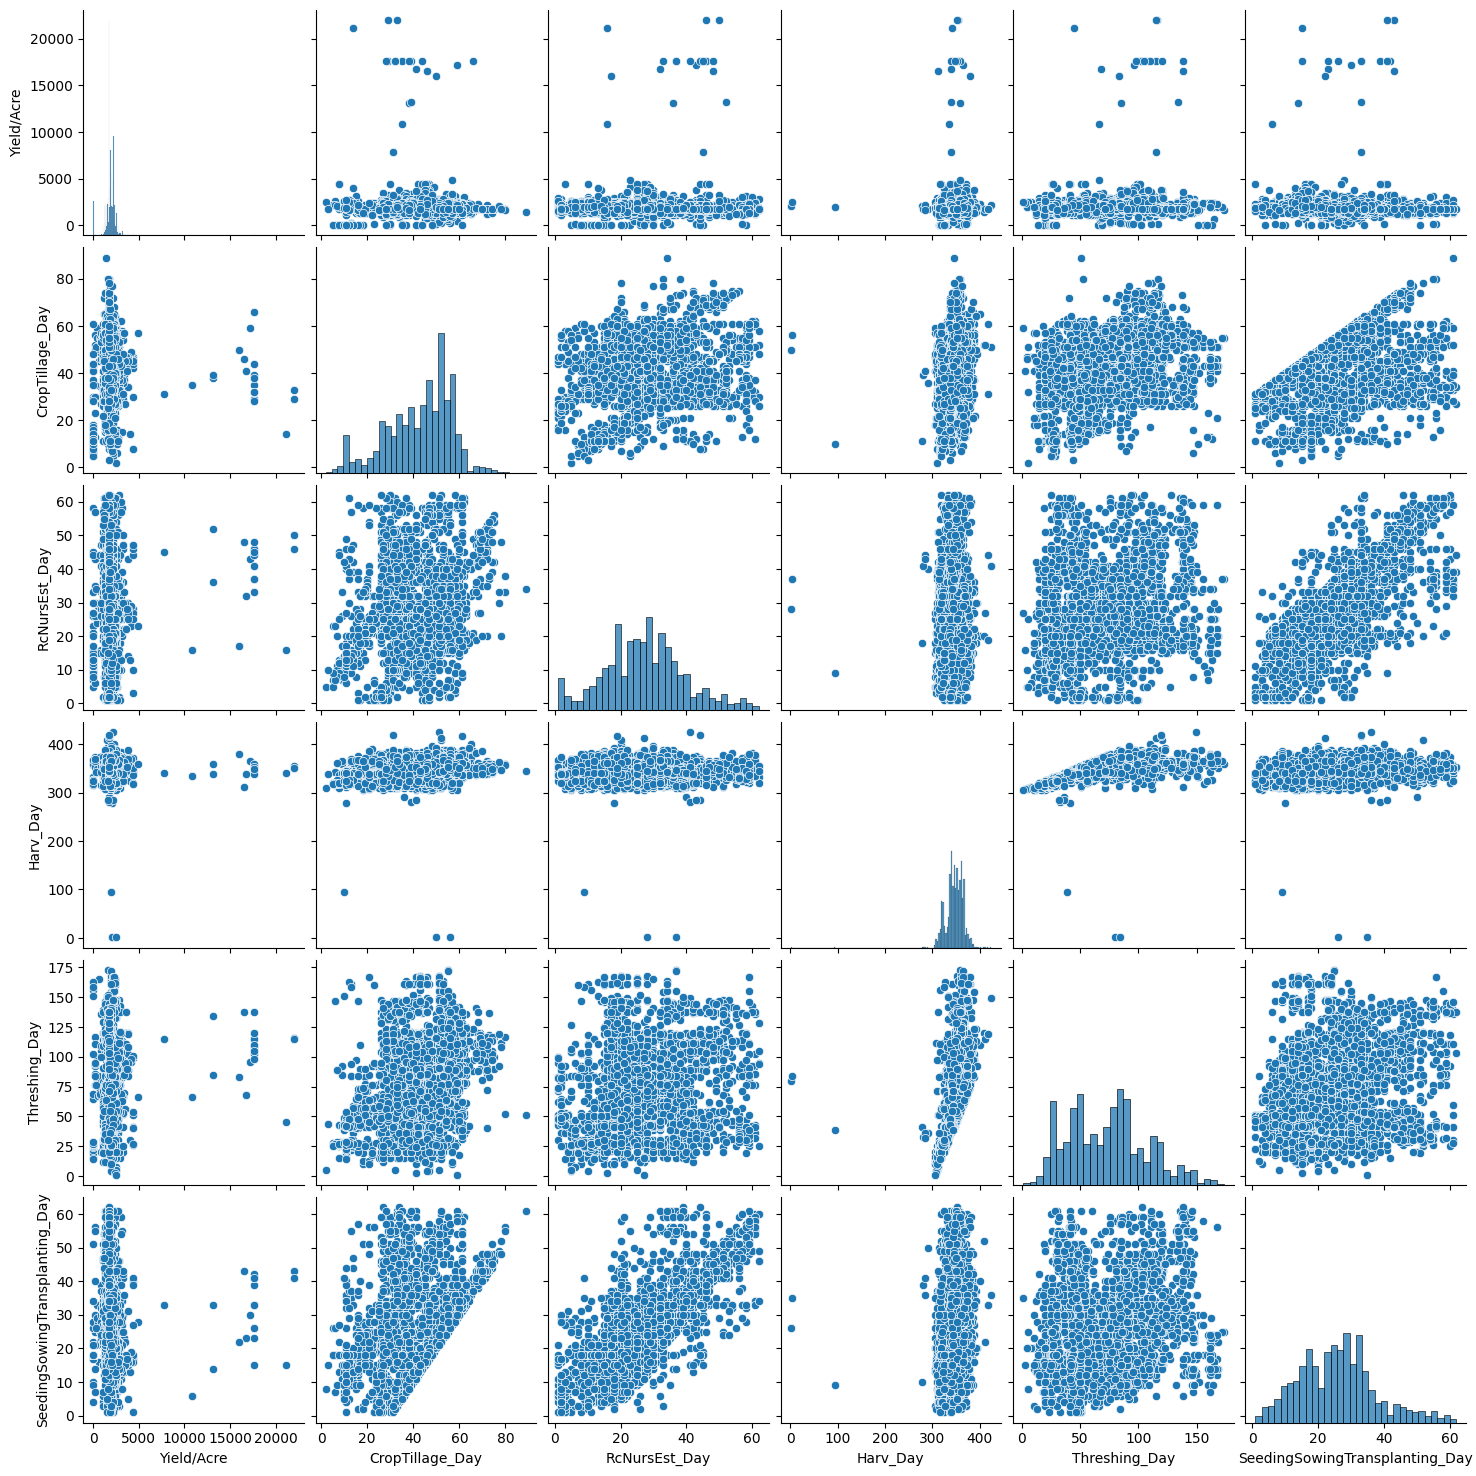

In [78]:
sns.pairplot(train_dates.drop(columns = ['ID']))

In [79]:
'''
X_dates = pd.merge(X, train_dates, on='ID', how='inner')
X_small_dates = pd.merge(X_small, train_dates, on='ID', how='inner')
X_large_dates =  pd.merge(X_large, train_dates, on='ID', how='inner')
X_no_outlier_dates =  pd.merge(X_no_outlier, train_dates, on='ID', how='inner')

y_dates = X_dates['Yield/Acre']
y_small_dates = X_small_dates['Yield/Acre']
y_large_dates = X_large_dates['Yield/Acre']
y_no_outlier_dates = X_no_outlier_dates['Yield/Acre']

X_dates = X_dates.drop(columns = ['Yield/Acre', 'ID'])
X_small_dates = X_small_dates.drop(columns = ['Yield/Acre', 'ID'])
X_large_dates = X_large_dates.drop(columns = ['Yield/Acre', 'ID'])


X_no_outlier_dates_ids = X_no_outlier_dates.ID
X_no_outlier_dates = X_no_outlier_dates.drop(columns = ['Yield/Acre', 'ID'])

'''

"\nX_dates = pd.merge(X, train_dates, on='ID', how='inner')\nX_small_dates = pd.merge(X_small, train_dates, on='ID', how='inner')\nX_large_dates =  pd.merge(X_large, train_dates, on='ID', how='inner')\nX_no_outlier_dates =  pd.merge(X_no_outlier, train_dates, on='ID', how='inner')\n\ny_dates = X_dates['Yield/Acre']\ny_small_dates = X_small_dates['Yield/Acre']\ny_large_dates = X_large_dates['Yield/Acre']\ny_no_outlier_dates = X_no_outlier_dates['Yield/Acre']\n\nX_dates = X_dates.drop(columns = ['Yield/Acre', 'ID'])\nX_small_dates = X_small_dates.drop(columns = ['Yield/Acre', 'ID'])\nX_large_dates = X_large_dates.drop(columns = ['Yield/Acre', 'ID'])\n\n\nX_no_outlier_dates_ids = X_no_outlier_dates.ID\nX_no_outlier_dates = X_no_outlier_dates.drop(columns = ['Yield/Acre', 'ID'])\n\n"

(array([1.330e+02, 1.500e+01, 3.380e+02, 1.774e+03, 1.224e+03, 2.890e+02,
        4.600e+01, 1.800e+01, 1.100e+01, 1.000e+00]),
 array([  15.4 ,  503.46,  991.52, 1479.58, 1967.64, 2455.7 , 2943.76,
        3431.82, 3919.88, 4407.94, 4896.  ]),
 <BarContainer object of 10 artists>)

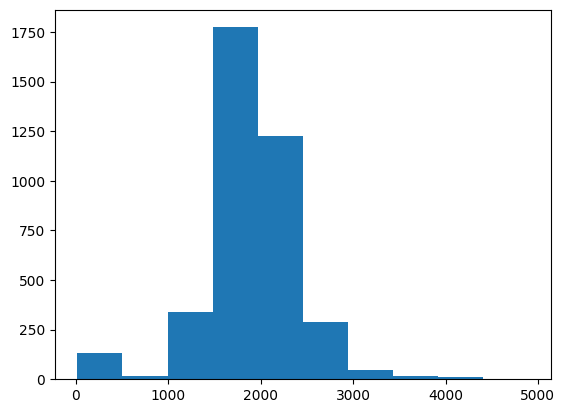

In [80]:
plt.hist(y_no_outlier)

## Preproccessing

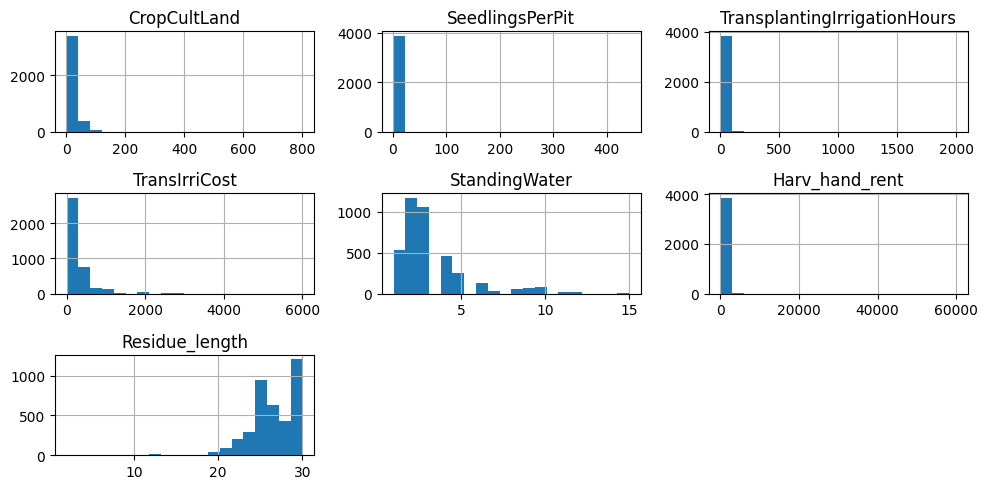

In [81]:
columns_to_logtransform = ['CropCultLand', 'SeedlingsPerPit', 'TransplantingIrrigationHours', 'TransIrriCost', 'StandingWater',
                        'Harv_hand_rent', 'Residue_length']

train_num_log = train_num[columns_to_logtransform]

train_num_log.hist(bins = 20, figsize=(10, 5))

plt.tight_layout()
plt.show()



In [82]:
def log_transform(x):
    print(x)
    return np.log1p(x)

transformer = FunctionTransformer(log_transform)


In [83]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3870 entries, 0 to 3869
Data columns (total 45 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   District                            3870 non-null   object 
 1   Block                               3870 non-null   object 
 2   CropEstMethod                       3870 non-null   object 
 3   TransplantingIrrigationSource       3870 non-null   object 
 4   TransplantingIrrigationPowerSource  3870 non-null   object 
 5   MineralFertAppMethod                3870 non-null   object 
 6   MineralFertAppMethod.1              3870 non-null   object 
 7   Harv_method                         3870 non-null   object 
 8   Threshing_method                    3870 non-null   object 
 9   Stubble_use                         3870 non-null   object 
 10  TractorPlough                       3870 non-null   int64  
 11  WetTillagePuddling                  3870 no

In [84]:
columns_to_CatTransform = list(range(10))
columns_to_NumTransform = ['Residue_perc', 'NoFertilizerAppln', 'CropTillageDepth']
columns_to_NumTransform_dates = ['Residue_perc', 'NoFertilizerAppln', 'CropTillageDepth', 'CropTillage_Day',	'RcNursEst_Day',	'Harv_Day',	'Threshing_Day',	'SeedingSowingTransplanting_Day']

In [85]:
subpipe_log = Pipeline(steps=[('log_trans', transformer),
                           ('ss', StandardScaler())])

subpipe_num = Pipeline(steps=[('ss', StandardScaler())])
subpipe_cat = Pipeline(steps=[('ohe', OneHotEncoder(drop= 'first', sparse=False, handle_unknown='ignore'))])

CT = ColumnTransformer(transformers= [('log_trans', subpipe_log, columns_to_logtransform),
                                      ('subpipe_num', subpipe_num, columns_to_NumTransform),
                                      ('subpipe_cat', subpipe_cat, columns_to_CatTransform)],
                                      remainder='passthrough')

CT_dates = ColumnTransformer(transformers= [('log_trans', subpipe_log, columns_to_logtransform),
                                      ('subpipe_num', subpipe_num, columns_to_NumTransform_dates),
                                      ('subpipe_cat', subpipe_cat, columns_to_CatTransform)],
                                      remainder='passthrough')

In [86]:
preprocess_pipe = Pipeline(steps=[('ct', CT)])
X_transformed = preprocess_pipe.fit_transform(X)

numeric_features = columns_to_logtransform + columns_to_NumTransform

categories = preprocess_pipe.named_steps['ct'].transformers_[2][1].named_steps['ohe'].get_feature_names_out()

all_columns = X.columns.tolist()
transformed_columns = columns_to_logtransform + columns_to_NumTransform + columns_to_CatTransform
untransformed_columns = [col for col in all_columns if col not in transformed_columns]

all_features = numeric_features + list(categories) + untransformed_columns
features_to_drop = ['District', 'Block', 'CropEstMethod', 'TransplantingIrrigationSource', 'TransplantingIrrigationPowerSource', 'MineralFertAppMethod', 'MineralFertAppMethod.1', 'Harv_method', 'Threshing_method', 'Stubble_use']
filtered_features = [item for item in all_features if item not in features_to_drop]

X = pd.DataFrame(X_transformed, columns=filtered_features)



      CropCultLand  SeedlingsPerPit  TransplantingIrrigationHours  \
0               40              2.0                           5.0   
1               26              2.0                           5.0   
2               10              2.0                           4.0   
3               15              2.0                           4.0   
4               60              2.0                           9.0   
...            ...              ...                           ...   
3865            28              2.0                           7.0   
3866             5              1.0                           3.0   
3867            45              1.0                           6.0   
3868            20              4.0                           2.0   
3869             4             10.0                           5.0   

      TransIrriCost  StandingWater  Harv_hand_rent  Residue_length  
0             200.0            2.0           400.0              30  
1             125.0            3.

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [87]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Data columns (total 66 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   CropCultLand                                 3870 non-null   float64
 1   SeedlingsPerPit                              3870 non-null   float64
 2   TransplantingIrrigationHours                 3870 non-null   float64
 3   TransIrriCost                                3870 non-null   float64
 4   StandingWater                                3870 non-null   float64
 5   Harv_hand_rent                               3870 non-null   float64
 6   Residue_length                               3870 non-null   float64
 7   Residue_perc                                 3870 non-null   float64
 8   NoFertilizerAppln                            3870 non-null   float64
 9   CropTillageDepth                             3870 non-null   float64
 10  

In [88]:
X_small_transformed = preprocess_pipe.fit_transform(X_small)

numeric_features = columns_to_logtransform + columns_to_NumTransform
categories = preprocess_pipe.named_steps['ct'].transformers_[2][1].named_steps['ohe'].get_feature_names_out()

all_columns = X_small.columns.tolist()
transformed_columns = columns_to_logtransform + columns_to_NumTransform + columns_to_CatTransform
untransformed_columns = [col for col in all_columns if col not in transformed_columns]

all_features = numeric_features + list(categories) + untransformed_columns
features_to_drop = ['District', 'Block', 'CropEstMethod', 'TransplantingIrrigationSource', 'TransplantingIrrigationPowerSource', 'MineralFertAppMethod', 'MineralFertAppMethod.1', 'Harv_method', 'Threshing_method', 'Stubble_use']
filtered_features = [item for item in all_features if item not in features_to_drop]

X_small = pd.DataFrame(X_small_transformed, columns=filtered_features)




      CropCultLand  SeedlingsPerPit  TransplantingIrrigationHours  \
0               40              2.0                           5.0   
1               26              2.0                           5.0   
2               10              2.0                           4.0   
3               15              2.0                           4.0   
4               60              2.0                           9.0   
...            ...              ...                           ...   
3865            28              2.0                           7.0   
3866             5              1.0                           3.0   
3867            45              1.0                           6.0   
3868            20              4.0                           2.0   
3869             4             10.0                           5.0   

      TransIrriCost  StandingWater  Harv_hand_rent  Residue_length  
0             200.0            2.0           400.0              30  
1             125.0            3.

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [89]:
preprocess_pipe = Pipeline(steps=[('ct', CT)])
X_large_transformed = preprocess_pipe.fit_transform(X_large)

numeric_features = columns_to_logtransform + columns_to_NumTransform

categories = preprocess_pipe.named_steps['ct'].transformers_[2][1].named_steps['ohe'].get_feature_names_out()

all_columns = X_large.columns.tolist()
transformed_columns = columns_to_logtransform + columns_to_NumTransform + columns_to_CatTransform
untransformed_columns = [col for col in all_columns if col not in transformed_columns]

all_features = numeric_features + list(categories) + untransformed_columns
features_to_drop = ['District', 'Block', 'CropEstMethod', 'TransplantingIrrigationSource', 'TransplantingIrrigationPowerSource', 'MineralFertAppMethod', 'MineralFertAppMethod.1', 'Harv_method', 'Threshing_method', 'Stubble_use']
filtered_features = [item for item in all_features if item not in features_to_drop]

X_large = pd.DataFrame(X_large_transformed, columns=filtered_features)




      CropCultLand  SeedlingsPerPit  TransplantingIrrigationHours  \
28              10              3.0                           4.0   
76              30              4.0                           2.0   
198             60              1.0                          22.0   
258             36              2.0                           4.0   
321             30              2.0                          30.0   
...            ...              ...                           ...   
3235            50              2.0                          10.0   
3240            70              2.0                          13.0   
3385            28              2.0                          25.0   
3614             4              4.0                          10.0   
3679            35              3.0                           4.0   

      TransIrriCost  StandingWater  Harv_hand_rent  Residue_length  
28            400.0            1.0           300.0              26  
76            300.0            1.

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [90]:
preprocess_pipe = Pipeline(steps=[('ct', CT)])
X_no_outlier_transformed = preprocess_pipe.fit_transform(X_no_outlier)

numeric_features = columns_to_logtransform + columns_to_NumTransform

categories = preprocess_pipe.named_steps['ct'].transformers_[2][1].named_steps['ohe'].get_feature_names_out()

all_columns = X_no_outlier.columns.tolist()
transformed_columns = columns_to_logtransform + columns_to_NumTransform + columns_to_CatTransform
untransformed_columns = [col for col in all_columns if col not in transformed_columns]

all_features = numeric_features + list(categories) + untransformed_columns
features_to_drop = ['District', 'Block', 'CropEstMethod', 'TransplantingIrrigationSource', 'TransplantingIrrigationPowerSource', 'MineralFertAppMethod', 'MineralFertAppMethod.1', 'Harv_method', 'Threshing_method', 'Stubble_use']
filtered_features = [item for item in all_features if item not in features_to_drop]

X_no_outlier = pd.DataFrame(X_no_outlier_transformed, columns=filtered_features)

      CropCultLand  SeedlingsPerPit  TransplantingIrrigationHours  \
0               40              2.0                           5.0   
1               26              2.0                           5.0   
2               10              2.0                           4.0   
3               15              2.0                           4.0   
4               60              2.0                           9.0   
...            ...              ...                           ...   
3865            28              2.0                           7.0   
3866             5              1.0                           3.0   
3867            45              1.0                           6.0   
3868            20              4.0                           2.0   
3869             4             10.0                           5.0   

      TransIrriCost  StandingWater  Harv_hand_rent  Residue_length  
0             200.0            2.0           400.0              30  
1             125.0            3.

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [91]:
X.to_csv('/content/drive/My Drive/Flatiron/Capstone/X.csv')
X_small.to_csv('/content/drive/My Drive/Flatiron/Capstone/X_small.csv')
X_large.to_csv('/content/drive/My Drive/Flatiron/Capstone/X_large.csv')
X_no_outlier.to_csv('/content/drive/My Drive/Flatiron/Capstone/X_no_outlier.csv')

y.to_csv('/content/drive/My Drive/Flatiron/Capstone/y.csv')
y_small.to_csv('/content/drive/My Drive/Flatiron/Capstone/y_small.csv')
y_large.to_csv('/content/drive/My Drive/Flatiron/Capstone/y_large.csv')
y_no_outlier.to_csv('/content/drive/My Drive/Flatiron/Capstone/y_no_outlier.csv')